In [114]:
import numpy as np
import math
from matplotlib import pyplot as plt

# Activation Functions


![test](https://www.i2tutorials.com/wp-content/uploads/2019/09/Deep-learning-25-i2tutorials.png)



In [188]:
def relu(z, deriv=False):
    activations = []
    shape = z.shape
    z = z.flatten()
    if deriv:
        for i in range(len(z)):
            if z[i] >= 0:
                activations.append(1)
            else:
                activations.append(-0.2)
        return np.array(activations).reshape(shape)
    for i in range(len(z)):
        if z[i] > 0:
            activations.append(z[i])
        else:
            activations.append(-0.2 * z[i])
    return np.array(activations).reshape(shape)

# Weight & Bias Initialization

Bias Values ($b$) are initialized with $0$.  
Weight Values ($w$) are initialized with random values between $-2$ and $2$.

In [232]:
def initialize(min=0, max=1):
    global w, b
#     w = [
#         max * np.random.randn(2, 3) + min,
#         max * np.random.randn(3, 3) + min,
#         max * np.random.randn(3, 2) + min,
#         max * np.random.randn(2, 1) + min
#     ]
    w = [
            max * np.random.uniform(min, max, (2, 3)),
            max * np.random.uniform(min, max, (3, 3)),
            max * np.random.uniform(min, max, (3, 2)),
            max * np.random.uniform(min, max, (2, 1))
        ]
    b = [
        np.array(np.zeros(3)),
        np.array(np.zeros(3)),
        np.array(np.zeros(2)),
        np.array(np.zeros(1))
    ]
    for i in range(len(b)): print(f'Layer {i}:\nWeights:\n {w[i]}\nBias: \n{b[i]}\n')    

w, b = [], []

initialize()



Layer 0:
Weights:
 [[0.24546327 0.62250386 0.39528455]
 [0.34376932 0.6027192  0.84442436]]
Bias: 
[0. 0. 0.]

Layer 1:
Weights:
 [[0.40082913 0.48342315 0.17930616]
 [0.74440985 0.17694403 0.71328436]
 [0.21824271 0.33972611 0.64358872]]
Bias: 
[0. 0. 0.]

Layer 2:
Weights:
 [[0.34894669 0.86454484]
 [0.61205193 0.01778507]
 [0.40488679 0.61820124]]
Bias: 
[0. 0.]

Layer 3:
Weights:
 [[0.1099028 ]
 [0.61903641]]
Bias: 
[0.]



# Forward Propagation
$a$ holds each layers activation vector.  
$z$ holds each layers pre nonlinearity vector.

## Algorithm

For each layer $L$, starting with $L_0$ we multiply the $h$ vector with the weight matrix $w$.

$$
w = \left[ \begin{array}{rrr}
1.3 & 0.2 \\                                              
0.1 & 1.4 \\
1.2 & 0 \\
\end{array}\right] \ \ \ \ \ \ \ 
h = \left( \begin{array}{rrr}
1.3 \\                                              
0.1 \\
1.2 \\
\end{array}\right)
$$

In [240]:
a, z = [], []

initialize()

def forward_prop(X):
    h = X
    global a, z
    a,z  = [], []
    for i in range(len(w)):
        h = h @ w[i] # weigt * input
        h = h + b[i] # bias add
        z.append(h)
        h = relu(h) # Activation Function
        a.append(h)
    return h

forward_prop(np.array([0,1]))

Layer 0:
Weights:
 [[0.96063305 0.94463216 0.90437261]
 [0.02254976 0.63848944 0.23344068]]
Bias: 
[0. 0. 0.]

Layer 1:
Weights:
 [[0.05448832 0.69212919 0.91454995]
 [0.93249491 0.51389037 0.69454665]
 [0.92066393 0.06377282 0.26062399]]
Bias: 
[0. 0. 0.]

Layer 2:
Weights:
 [[0.27826529 0.83146832]
 [0.55845366 0.95305448]
 [0.47480707 0.51586158]]
Bias: 
[0. 0.]

Layer 3:
Weights:
 [[0.21724967]
 [0.24320008]]
Bias: 
[0.]



array([0.4597928])

# Back Prop

for each layer

$g = loss'(X,y)$

## Step 1 ($a$ to $z$)

$g = relu'(z)$



## Step 2 ($z$ to $W$)

$g = relu'(z) * a_{L-1}$

# Dimensions

$g = [1\times2]$

## Step 1 Activation Function Derriv

$g = [1\times2]$


In [214]:
learning_rate = 0.05

initialize()

def back_prop(X, y, print_loss=False):
    global a, z, w, b

    g = (X - y).reshape(1,-1).T
    loss = 0.5*(y - X)**2
    
    if print_loss:y
        print("Loss: ", (y - X)**2)
    
    n_weights, n_bias = [], []
    
    for x in range(len(w)):
        i = len(b) - 1 - x

        # Activation Function Derrivative [1xn]
        g = g * relu(z[i], True)  # Activation Function Derriv
        
        # Derivative with respect to weight [1xn]  
        if i-1 < 0: w_der = y.reshape(1,-1).T
        else: w_der = a[i-1].reshape(1,-1).T  # Previous Layer Activation
        
        
#         print(w_der.shape, g.shape)
#         print((w_der @ g).shape)
        
        # Change in Weights
        new_weights = w[i] - learning_rate * (w_der @ g)
        n_weights.append(new_weights)
        
        new_bias = b[i] - learning_rate * g
        n_bias.append(new_bias)
        
        g = g @ w[i].T 
    
    n_weights = list(reversed(n_weights))
    n_bias = list(reversed(n_bias))
    w = n_weights
    b = n_bias
    
    return loss
    

X = forward_prop(np.array([0,1]))
print(X)
back_prop(X, np.array([1]))

Layer 0:
Weights:
 [[-0.51666303  0.12744667 -0.74715203]
 [ 0.61821264 -0.93676889  0.03960861]]
Bias: 
[0. 0. 0.]

Layer 1:
Weights:
 [[-0.18267017 -0.02219009 -0.00438998]
 [ 0.85068071 -0.62054631  0.23438947]
 [ 0.49467297  0.07474434  0.50620963]]
Bias: 
[0. 0. 0.]

Layer 2:
Weights:
 [[-0.90396946 -0.33050226]
 [-0.49088497  0.34388385]
 [-0.53414698  0.67032197]]
Bias: 
[0. 0.]

Layer 3:
Weights:
 [[0.56379138]
 [0.74686582]]
Bias: 
[0.]

[0.0327138]


array([0.4678213])

In [201]:
from random import randint

def train(epochs, size=100):
    for i in range(epochs):
        tmp = 0.0
        for x in range(size):
            y1 = randint(0,1)
            y2 = randint(0,1)
            tmp += back_prop(forward_prop(np.array([y1,y2])), np.array([y1+y2]))[0]
        print("Loss: ", tmp/size)

initialize()
train(20, 100)
print(forward_prop(np.array([0.2,0.3])))
print(forward_prop(np.array([0.7,0.2])))
print(forward_prop(np.array([1,0])))
print(forward_prop(np.array([1,1])))

Layer 0:
Weights:
 [[ 0.38326112  0.20813528  0.65402631]
 [-0.60344405 -0.95827159 -0.68812989]]
Bias: 
[0. 0. 0.]

Layer 1:
Weights:
 [[-0.95325366 -0.11602268 -0.71821794]
 [ 0.66631753  0.25503068  0.67829376]
 [ 0.08198395 -0.40475491 -0.87494075]]
Bias: 
[0. 0. 0.]

Layer 2:
Weights:
 [[ 0.31007906 -0.02763918]
 [ 0.32109855  0.46705216]
 [ 0.19892856 -0.72172763]]
Bias: 
[0. 0.]

Layer 3:
Weights:
 [[ 0.97445982]
 [-0.50544974]]
Bias: 
[0.]

Loss:  [0.31662367]
Loss:  [0.20629137]
Loss:  [0.12505463]
Loss:  [0.10846328]
Loss:  [0.36172064]
Loss:  [0.30606753]
Loss:  [0.28201808]
Loss:  [0.22351974]
Loss:  [0.19475317]
Loss:  [0.12504714]
Loss:  [0.09297734]
Loss:  [0.03374398]
Loss:  [0.01372965]
Loss:  [0.00697562]
Loss:  [0.00360523]
Loss:  [0.00190138]
Loss:  [0.00132749]
Loss:  [0.00064864]
Loss:  [0.00039781]
Loss:  [0.00019196]
[[0.57059579]]
[[0.92424873]]
[[0.98530438]]
[[1.99989214]]


## Learning XOR

Layer 0:
Weights:
 [[ 0.07243197  0.92949268 -0.5681808 ]
 [-0.49274022  0.16899668 -0.9631557 ]]
Bias: 
[0. 0. 0.]

Layer 1:
Weights:
 [[-0.91423824  0.33467501 -0.75320216]
 [ 0.99480763  0.81511452  0.72386541]
 [-0.50346328  0.26119557 -0.47618035]]
Bias: 
[0. 0. 0.]

Layer 2:
Weights:
 [[ 0.77368507 -0.69918731]
 [ 0.98863491  0.30958704]
 [ 0.92683733  0.2915784 ]]
Bias: 
[0. 0.]

Layer 3:
Weights:
 [[-0.27812338]
 [-0.61687629]]
Bias: 
[0.]

Loss:  [0.14452175]
Loss:  [0.11601609]
Loss:  [0.03316109]
Loss:  [0.00320033]
Loss:  [0.00439539]
Loss:  [0.00228898]
Loss:  [0.00122911]
Loss:  [0.00234441]
Loss:  [0.00055462]
Loss:  [0.00023959]
[[0.99167947]]
[[0.99624452]]
[[0.00207474]]
[[0.00285716]]


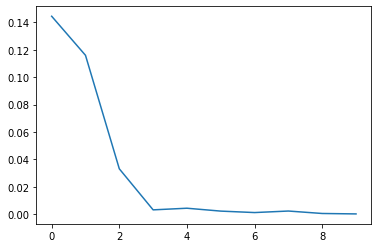

In [239]:
X = [
    [0,1],
    [0,0],
    [1,0],
    [1,1]
]

y = [1,0,1,0]

initialize(-1, 1)

def train(epochs, size=100):
    l = []
    for i in range(epochs):
        tmp = 0.0
        for x in range(size):
            y1 = randint(0,3)
            tmp += back_prop(forward_prop(np.array(X[y1])), np.array(y[y1]))[0]
        l.append(tmp/size)
        print("Loss: ", tmp/size)
    return np.array(l).flatten()

loss_over_time =  train(10,1000)

print(forward_prop(np.array([1,0])))
print(forward_prop(np.array([0,1])))
print(forward_prop(np.array([0,0])))
print(forward_prop(np.array([1,1])))

plt.plot(loss_over_time)

In [137]:
forward_prop(np.array(X))

array([[1.00000000e+00],
       [2.28705943e-15],
       [1.00000000e+00],
       [5.55111512e-16]])

In [132]:
back_prop(forward_prop(np.array(X)), np.array(y))

ValueError: operands could not be broadcast together with shapes (16,1) (4,1) 

In [194]:
w

[array([[ 0.14814429,  1.92823901, -2.06791328],
        [-0.97452615, -0.0620619 , -3.26824922]]),
 array([[ 0.572514  , -0.15953226, -0.44648438],
        [-1.74452763, -1.99973026, -0.06683409],
        [-0.65625722,  0.14834307, -2.67960944]]),
 array([[ 1.80100234, -0.28922883],
        [-0.03161335,  2.26802412],
        [ 1.73792913, -2.65500696]]),
 array([[-5.27508321],
        [ 2.62224999]])]